# Propagation of Uncertainty
 In statistics, propagation of uncertainty (or propagation of error) refers to the effect of random errors in a set of variables on the resulting uncertainty on a function that depends on these variables. 

## Example: Projectile Motion
Consider a simple example from mechanics.  A projectile moving with constant velocity, $v_0$, is not exposed to any forces. If the projectile is at position $x(t=0)=x_0$ at time $t=0$, its position at  a later time $t$ is
$$
x = x_0 + v_0 t.
$$

Imagine however, that because of imperfections in the measuerement apparatus, the initial position, $x_0$ and velocity, $v_0$ are not known exactly. Instead,  we were only able to measure them at time $t=0$ to within some measurement uncertainty.  Given this source of measurement error, how well do we know the position of the projectile $x$ at the later time $t$?

First of all, let's be more precise about what we mean by *measurement uncertainty*. We mean that $x_0$ and $v_0$ are random variables described by some probability distribution function(s).  In general, the functional form of these distribution(s) are arbitrary, and depend on the details of the measurement process. Furthermore, it need not even be the case that the $x_0$ and $v_0$ fluctuate (due to measurement error) independently of each other. For example, it could be that an upward noise fluctuation resulting in an $x_0$ measurement larger than the true value, makes it more likely that $v_0$ is measured to be larger than its true value, etc. In this case, to propagate the uncertainties we would require knowledge of the  **joint probability distribution** of $x_0$ and $v_0$, $P(x_0, v_0)$, which describes the correlated fluctuations of these two random variables.  For simplicity, let's assume that the measurement errors are independent of each other, such that the noise in our measurement of $x_0$ is not correlated with the noise in our measurement of $v_0$.  In this case, following eqn.(<a href="#eqn:joint">4</a>), the joint probability distribution factorizes into the product of the individual probability distributions, $P(x_0, v_0) = P(x_0)P(v_0)$, and we need only consider the two separate probability distributions, $P(x_0)$ and $P(v_0)$, for the initial position and velocity, respectively.

So the general question we want to answer is: given the probability distributions $P(x_0)$ and $P(v_0)$ for $x_0$ and $v_0$, what is the probability distribution of $x$, $P(x)$ at a later time $t$?  Analytical solutions to this problem exist only for specific
forms of the probability distributions. For the general case,  computer simulations using random numbers, known as **Monte Carlo** simulations, are extremely powerful, which we will come to shortly. 

But before solving for the full distributuion $P(x)$, we will consider some general statements that we can make about the mean, $\langle x\rangle$, and variance, ${\rm Var}(x) = \sigma_{x}^2$, given the the mean and variance of $x_0$ and $v_0$. In other words, we are going to take our measured values, which we will refer to as ${\hat x}_0$ and ${\hat v}_0$, to be the mean values of the probability distributions, i.e. 
$$
\langle x_0 \rangle = {\hat x_0} \quad \text{and} \quad \langle v_0 \rangle = {\hat v_0}.
$$
and we will assume that variances $\sigma^2_{x_0}= {\rm Var}(x_0)$ and $\sigma^2_{v_0} = {\rm Var}(v_0)$ are determined by our experiment. 


## Example: Projectile Motion - Linear Uncertainty Propagation

Returning to the example of the projectile, we can use these properties of the mean and variance operators to calculate the mean and variance of $x(t)$, $\langle x(t)\rangle$ and $\sigma^2_{x(t)}$. We have
$$
\langle x\rangle = \langle x_0 + v_0 t \rangle = \langle x_0 \rangle + t \langle v_0 \rangle,
$$ 
and 
$$
\sigma^2_{x} = {\rm Var}(x)  = {\rm Var}(x_0 + v_0 t) = {\rm Var}(x_0) + t^2 {\rm Var}(v_0) = \sigma_{x_0}^2 + t^2 \sigma_{v_0}^2,
$$
or simplifying,
$$
\sigma_{x} = \sqrt{\sigma_{x_0}^2 + t^2 \sigma_{v_0}^2}.
$$

To make this more concrete suppose that at time $t=0~{\rm s}$ we measure ${\hat x}_0 = 10~{\rm m} = \langle x_0\rangle$ and ${\hat v}_0 = 5~{\rm m~s^{-1}}=\langle v_0 \rangle$, and that we obtain $\sigma_{x_0} = 1~{\rm m}$ and $\sigma_{v_0} = 0.5~{\rm m~s^{-1}}$ from our experimental setup. We want to know the position $x(t=2~{\rm s})$. Plugging in numbers we get
$$
\langle x(2~{\rm s})\rangle = \langle x_0 \rangle + 2~{\rm s} \langle v_0 \rangle = 10~{\rm m} + 2~{\rm s} \times 5~{\rm m~s^{-1}} = 20~{\rm m},
$$
and
<a id='eqn:sigma_x'></a>
$$
\sigma_{x(2~{\rm s})} = \sqrt{\sigma_{x_0}^2 + t^2 \sigma_{v_0}^2} = \sqrt{1~{\rm m}^2 + (2~{\rm s})^2({0.5~{\rm m~s^{-1}}})^2} = \sqrt{1 + 1}~{\rm m} = \sqrt{2}~{\rm m} \tag{1}.
$$

## Uncertainty Propagation for a Nonlinear Function of Multiple Variables

The example above is a simple case of uncertainty propagation, where we have a linear function of two variables. In general, we might have a function $f$ of multiple variables, $x_1, x_2, x_3, ...$, and the dependencies on these variables might be nonlinear. To understand why this is a difficult problem, consider the mean
$$
\langle f(x_1, x_2, x_3, ...)\rangle = \int f(x_1, x_2, x_3, ...) P(x_1)P(x_2)P(x_3) ... dx_1 dx_2 dx_3 ...
$$
Since $f$ is a nonlinear function, we cannot solve this in general without knowing the functional forms $P(x_i)$, and furthermore even if we did, doing integrals in many dimensions can be challenging or compuationally intractable. 

But in the limit of **small uncertainties**, we can use the **Taylor expansion** of $f(x_1, x_2, x_3, ...)$ to linearize the function $f$ in the neighborhood of the measured (mean) values of the variables, $\langle x_i\rangle $. To linear order the Taylor expansion of $f$ is
$$
f(x_1, x_2, x_3, ...) \simeq f(\langle x_1\rangle, \langle x_2\rangle, \langle x_3\rangle, ...) + \sum_i \left.\frac{\partial f}{\partial x_i}\right|_{\langle x_1\rangle, \langle x_2\rangle, \langle x_3\rangle, ...} (x_i - \langle x_i\rangle).
$$
Using the properties of the mean and variance operators that we derived above, it then follows trivially that
$$
\langle f(x_1, x_2, x_3, ...)\rangle \simeq f(\langle x_1\rangle, \langle x_2\rangle, \langle x_3\rangle, ...),
$$
and
$$
{\rm Var}[f(x_1, x_2, x_3, ...)] \simeq \sum_i \left.\frac{\partial f}{\partial x_i}\right|_{\langle x_1\rangle, \langle x_2\rangle, \langle x_3\rangle, ...}^2 \sigma^2_{x_i}, 
$$
where 
$$
\sigma^2_{x_i} = {\rm Var}(x_i).
$$
Hence 
<a id='eqn:sigma_f'></a>
$$
\sigma_f = 
\sqrt{\left(\frac{\partial f}{\partial x_1}\right)^2 \sigma^2_{x_1} + \left(\frac{\partial f}{\partial x_2}\right)^2 \sigma^2_{x_2} + \left(\frac{\partial f}{\partial x_3}\right)^2 \sigma^2_{x_3} + ...}. \tag{2}
$$
where it is understood that the partial derivatives are evaluated at the mean values of the variables $\langle x_1\rangle$, $\langle x_2\rangle$, $\langle x_3\rangle$, ...

## Example: Projectile Motion - Nonlinear Uncertainty Propagation

Returning again to our projectile, let's now imagine that the time $t$ at which we need to know its position 
is also subject to measurement error. Namely, we measure the time to be  ${\hat t} = 2~{\rm s} = \langle t\rangle$ but with an uncertainty $\sigma_t = 0.2~{\rm s}$. As before ${\hat x}_0 = 10~{\rm m} = \langle x_0\rangle$,  $\sigma_{x_0} = 1~{\rm m}$, ${\hat v}_0 = 5~{\rm m~s^{-1}}=\langle v_0 \rangle$, and $\sigma_{v_0} = 0.5~{\rm m~s^{-1}}$. 

Applying what we learned above
$$
x(x_0, v_0, t) = x_0 + v_0 t,  
$$
and hence 
$$
\langle x\rangle = \langle x_0\rangle + \langle v_0\rangle \langle t\rangle = 10~{\rm m} + 5~{\rm m~s^{-1}} \times 2~{\rm s} = 20~{\rm m},
$$
For the variance we need the partial derivatives of $x$ with respect to $x_0$, $v_0$, and $t$
$$
\frac{\partial x}{\partial x_0} = 1, \quad \frac{\partial x}{\partial v_0} = t, \quad \frac{\partial x}{\partial t} = v_0. 
$$
Evaluating these at the mean values of the variables, and plugging into eqn.(<a href="#eqn:sigma_f">2</a>), we get 
$$
\sigma_x = \sqrt{\sigma^2_{x_0} + {\hat t}^2 \sigma^2_{v_0} + {\hat v}_0^2 \sigma^2_t} = \sqrt{(1~{\rm m})^2 + (2~{\rm s})^2(0.5~{\rm m~s^{-1}})^2 + (5~{\rm m~s^{-1}})^2(0.2~{\rm s})^2} = \sqrt{1 + 1 + 1}~{\rm m} = \sqrt{3}~{\rm m}.
$$
Notice that there is now an extra term under the square root as compared to eqn.(<a href="#eqn:sigma_x">1</a>), which arises because of the additional uncertainty in the time measurement, and the total uncertainty in the position is thus larger.

## Example: Monte Carlo Simulation of Uncertainty Propagation

The expressions that we derived in the example for $\langle x\rangle$ and $\sigma_x$ are general, and valid for any form of the 
distributions $P(x_0)$, $P(v_0)$, and $P(t)$. We only assumed that statistical independence of the measurement errors, and that
we knew the means and variances of these distributions.

Now will consider specific forms for the probability distributions of $x_0$ and $v_0$, namely we will assume 
$$ 
P(x_0) = \mathcal{N}(x_0| {\hat x}_0, \sigma_{x_0}), \quad P(v_0) = \mathcal{N}(v_0| {\hat v}_0, \sigma_{v_0}), \quad P(t) = \mathcal{N}(t| {\hat t}, \sigma_t).
$$
where $\mathcal{N}(u|\mu, \sigma)$ is the Gaussian (normal) distribution function defined above. As discussed above, we set the mean $\mu$ of each Gaussian to be the measured values from our experiment,  ${\hat x}_0$, ${\hat v}_0$, and ${\hat t}$, and we assume
that our experiment delivers the standard deviations $\sigma_{x_0}$, $\sigma_{v_0}$, and $\sigma_t$ of each respective measurement. 
We are thus interpreting our experimental measurements to be a single realization of a random process described by these probability distributions. 

A way of concisely summarizing our measurements is to write
$$
x_0 = {\hat x}_0 \pm \sigma_{x_0} = 10 \pm 1~{\rm m}, \quad v_0 = {\hat v}_0 \pm \sigma_{v_0} = 5 \pm 0.5~{\rm m~s^{-1}}, \quad t = {\hat t} \pm \sigma_t = 2 \pm 0.2~{\rm s}.
$$
The $\pm$ is a convention that indicates what the lower 16th and upper 84th percentiles of the variable. Since our distributions are Gaussian, this is equivalent to $\pm$ the standard deviation. The plus and minus values defined in this way are also the **error bars** that you would use if you were plotting such noisy data (see Week5 lecture). Note that in general the 16th and 84th percentiles denoted by the $\pm$ will not always be symmetric about the mean (i.e. consider a skewed distribution like our household income distribution example above). 

We need just one more ingredient to calculate the probability distribution of $x$, namely its functional form! In other words, above  we used the properties of the mean and variance operators to make the general statements 
$$
\langle x\rangle = \langle x_0\rangle + \langle v_0\rangle \langle t\rangle, \quad \quad \sigma_x = \sqrt{\sigma^2_{x_0} + {\hat t}^2 \sigma^2_{v_0} + {\hat v}_0^2 \sigma^2_t},
$$
in the limit of small errors (so that our Taylor expansion is valid). But knowing these two **moments** of the distribution $P(x)$ do not uniquely specify its functional form. To proceed analytically, we will exploit one the property of Gaussians that we mentioned above, namely that any linear combination of independent Gaussian random variables is also Gaussian.  So we can finally write
that
$$
P(x) \approx \mathcal{N}(x| \langle x\rangle, \sigma_x^2) ; \quad \quad \langle x\rangle = \langle x_0\rangle + \langle v_0\rangle \langle t\rangle = 20~{\rm m}, \quad \quad \sigma_x = \sqrt{\sigma^2_{x_0} + {\hat t}^2 \sigma^2_{v_0} + {\hat v}_0^2 \sigma^2_t} = \sqrt{3}~{\rm m}.
$$
where the approximation symbol reminds us that our function  $x(x_0, v_0, t) = x_0 + v_0 t$ is actually nolinear (because of the product of $v_0$ and $t$), but in the limit of small errors, it will depend linearly on its parameters (i.e. the Taylor expansion), so that the probability distribution of $x$ will be approximately Gaussian.


mu_x_sample = 20.000403 m, sigma_x_sample = 1.735715 m
mu_x_theory = 20.000000 m, sigma_x_theory = 1.732051 m


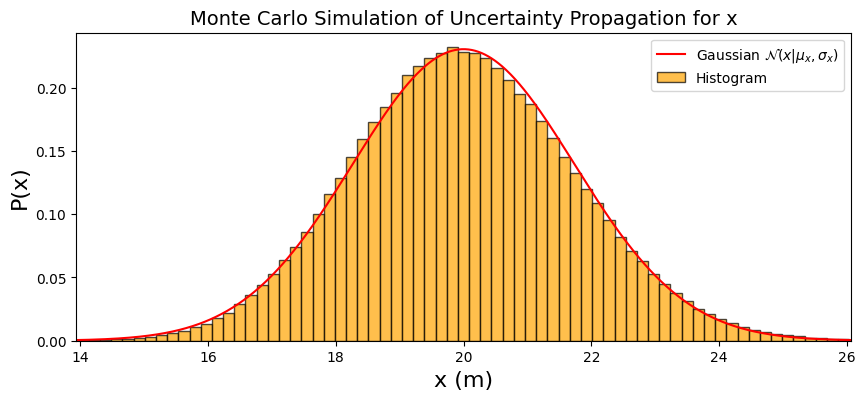

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
seed = 42
rng = np.random.default_rng(seed)

# Define the means and standard deviations of the distributions
mu_x0, sigma_x0 = 10, 1
mu_v0, sigma_v0 = 5, 0.5
mu_t, sigma_t = 2, 0.2

# Generate samples from the distributions
x0_samples = rng.normal(mu_x0, sigma_x0, 1000000)
v0_samples = rng.normal(mu_v0, sigma_v0, 1000000)
t_samples  = rng.normal(mu_t, sigma_t, 1000000)

# Calculate x for each sample
x_samples = x0_samples + v0_samples * t_samples

# Calculate the mean and standard deviation derived from the 
# properties of the mean and variance operators
mu_x_theory = mu_x0 + mu_v0 * mu_t
sigma_x_theory = np.sqrt(sigma_x0**2 + (mu_v0**2 * sigma_t**2) + (sigma_v0**2 * mu_t**2))

# Calculate the mean and standard deviation of the actual random x samples
mu_x_sample = np.mean(x_samples)
sigma_x_sample = np.std(x_samples)


# Compute the histogram
bins = np.linspace(mu_x_theory - 5*sigma_x_theory, mu_x_theory + 5*sigma_x_theory, 100)
counts, _ = np.histogram(x_samples, bins=bins, density=True)


# Plot the histogram and the Gaussian distribution function
fig, ax = plt.subplots(figsize=(10, 4))
# Plot the histogram
ax.bar(bins[:-1], counts, width=np.diff(bins), align='edge', color='orange', alpha=0.7, edgecolor='black', label='Histogram')

# Compute the Gaussian distribution function on a finer grid
x_fine = np.linspace(mu_x_theory - 5*sigma_x_theory, mu_x_theory + 5*sigma_x_theory, 1000)
gaussian = norm.pdf(x_fine, loc=mu_x_theory, scale=sigma_x_theory)

# Plot the Gaussian distribution function
ax.plot(x_fine, gaussian, 'r-', label=r'Gaussian $\mathcal{N}(x|\mu_x, \sigma_x)$')
ax.set_xlim(mu_x_theory - 3.5*sigma_x_theory, mu_x_theory + 3.5*sigma_x_theory)

# Add labels and legend
ax.set_xlabel('x (m)', fontsize=16)
ax.set_ylabel('P(x)', fontsize=16)
ax.set_title('Monte Carlo Simulation of Uncertainty Propagation for x', fontsize=14)
plt.legend()

# Print the results
print(f"mu_x_sample = {mu_x_sample:.6f} m, sigma_x_sample = {sigma_x_sample:.6f} m")
print(f"mu_x_theory = {mu_x_theory:.6f} m, sigma_x_theory = {sigma_x_theory:.6f} m")